In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('NF-UQ-NIDS.csv')

In [3]:
df.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack,Dataset
0,149.171.126.0,62073,59.166.0.5,56082,6,0.0,9672,416,11,8,25,15,0,Benign,NF-UNSW-NB15
1,149.171.126.2,32284,59.166.0.5,1526,6,0.0,1776,104,6,2,25,0,0,Benign,NF-UNSW-NB15
2,149.171.126.0,21,59.166.0.1,21971,6,1.0,1842,1236,26,22,25,1111,0,Benign,NF-UNSW-NB15
3,59.166.0.1,23800,149.171.126.0,46893,6,0.0,528,8824,10,12,27,124,0,Benign,NF-UNSW-NB15
4,59.166.0.5,63062,149.171.126.2,21,6,1.0,1786,2340,32,34,25,1459,0,Benign,NF-UNSW-NB15


In [4]:
df.shape

(11994893, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11994893 entries, 0 to 11994892
Data columns (total 15 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   IPV4_SRC_ADDR               object 
 1   L4_SRC_PORT                 int64  
 2   IPV4_DST_ADDR               object 
 3   L4_DST_PORT                 int64  
 4   PROTOCOL                    int64  
 5   L7_PROTO                    float64
 6   IN_BYTES                    int64  
 7   OUT_BYTES                   int64  
 8   IN_PKTS                     int64  
 9   OUT_PKTS                    int64  
 10  TCP_FLAGS                   int64  
 11  FLOW_DURATION_MILLISECONDS  int64  
 12  Label                       int64  
 13  Attack                      object 
 14  Dataset                     object 
dtypes: float64(1), int64(10), object(4)
memory usage: 1.3+ GB


In [6]:
df.drop(columns=['Dataset'],inplace=True)

In [7]:


pd.set_option('display.float_format', '{:,.2f}'.format)

print(df['IN_BYTES'].describe(),'\n')
print(df['OUT_BYTES'].describe())

count    11,994,893.00
mean          3,983.73
std         166,225.61
min               0.00
25%              68.00
50%             232.00
75%           1,440.00
max     228,223,480.00
Name: IN_BYTES, dtype: float64 

count    11,994,893.00
mean          9,489.45
std         293,354.39
min               0.00
25%               0.00
50%             156.00
75%           1,873.00
max     243,219,688.00
Name: OUT_BYTES, dtype: float64


In [8]:
df.duplicated().sum()

1265854

In [9]:
df = df.drop_duplicates().reset_index(drop=True)

In [10]:
df.shape

(10729039, 14)

In [11]:
df.columns

Index(['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', 'Label', 'Attack'],
      dtype='object')

In [12]:
df1 = df.select_dtypes(exclude='O')
df2 = df.select_dtypes(include='O')

In [13]:
df1.describe().round(2)

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label
count,"10,729,039.00","10,729,039.00","10,729,039.00","10,729,039.00","10,729,039.00","10,729,039.00","10,729,039.00","10,729,039.00","10,729,039.00","10,729,039.00","10,729,039.00"
mean,"43,254.80","7,465.78",8.90,19.50,"4,372.99","10,553.55",39.30,13.90,53.75,"2,362,754.92",0.21
std,"19,639.98","15,990.14",6.56,34.83,"175,751.79","310,104.19","2,011.03",549.01,79.59,"2,131,195.35",0.41
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"36,228.00",53.00,6.00,0.00,71.00,52.00,1.00,1.00,0.00,0.00,0.00
50%,"51,092.00",443.00,6.00,0.00,309.00,178.00,4.00,2.00,25.00,"4,284,517.00",0.00
75%,"56,328.00","3,389.00",17.00,7.13,"1,464.00","1,873.00",10.00,8.00,29.00,"4,294,889.00",0.00
max,"65,535.00","65,535.00",255.00,251.00,"228,223,480.00","243,219,688.00","1,221,043.00","1,349,068.00",223.00,"4,294,967.00",1.00


In [14]:
for i in df2.columns:
    print("nuniques for ",i," is:",df2[i].nunique())
    print(" ")


nuniques for  IPV4_SRC_ADDR  is: 75630
 
nuniques for  IPV4_DST_ADDR  is: 27826
 
nuniques for  Attack  is: 21
 


In [15]:
df2['Attack'].value_counts()

Attack
Benign            8440723
DDoS               582535
Reconnaissance     482930
injection          464479
DoS                251127
password           150519
xss                 99920
Brute Force         85509
Infilteration       59505
Exploits            24727
scanning            20814
Fuzzers             19330
Backdoor            19021
Bot                 15498
Generic              5555
Analysis             1990
Theft                1909
Shellcode            1365
mitm                 1288
Worms                 153
ransomware            142
Name: count, dtype: int64

In [16]:
#top 5 attacks are ddos,recconnaissance,injection,dos,Brute Force

In [17]:
#attack to benign ratio

benign_df = df2[df2['Attack'] == 'Benign']
attack_df = df2[df2['Attack'] != 'Benign']



In [18]:
print("Attacks: ",attack_df.shape[0],"Benign: ",benign_df.shape[0])
print("\n")
print("Attack to benign",attack_df.shape[0]/benign_df.shape[0])
print("\n")
total = attack_df.shape[0]+benign_df.shape[0]
print("Attack percentage: ",attack_df.shape[0]/total,"   Benign percentage: ",benign_df.shape[0]/total  )

Attacks:  2288316 Benign:  8440723


Attack to benign 0.27110426440957724


Attack percentage:  0.21328247571846837    Benign percentage:  0.7867175242815316


In [19]:
#significant class imbalance noted

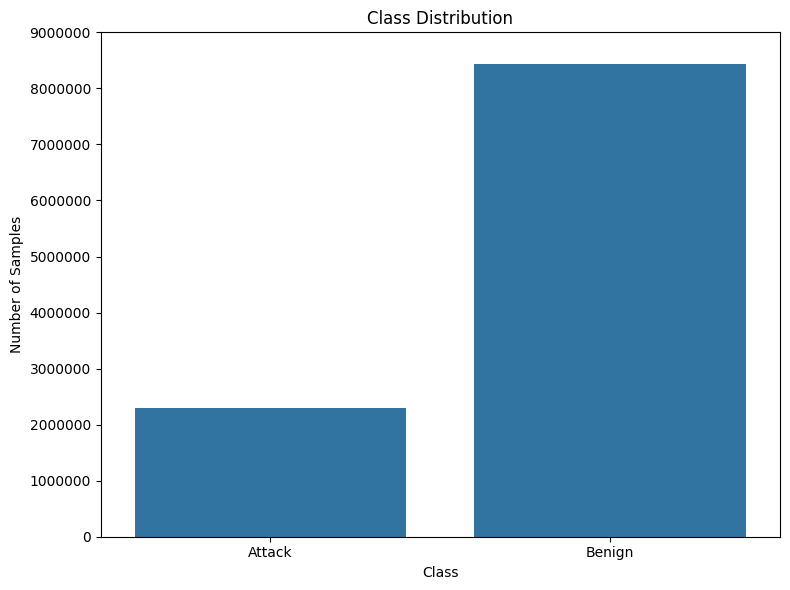

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
counts = [attack_df.shape[0], benign_df.shape[0]]
labels = ['Attack', 'Benign']

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=counts) 
plt.title('Class Distribution')
plt.ylabel('Number of Samples')
plt.xlabel('Class')
plt.ticklabel_format(style='plain', axis='y') 
plt.yticks(range(0, 10000000, 1000000))
plt.tight_layout()
plt.show()


In [21]:
high_protocol = df['PROTOCOL'].value_counts()[df['PROTOCOL'].value_counts()>20]


In [22]:
df['PROTOCOL'].value_counts().head(20)


PROTOCOL
6      7990227
17     2704171
1        14451
2         6782
58        1956
89         908
47          86
33          77
77          77
55          77
53          77
41          77
103         77
132         70
0           45
142         41
141         41
171         41
172         41
173         41
Name: count, dtype: int64

In [23]:
import numpy as np
df['Attack_Binary'] = np.where(df['Attack'] == 'Benign', 'Benign', 'Attack')

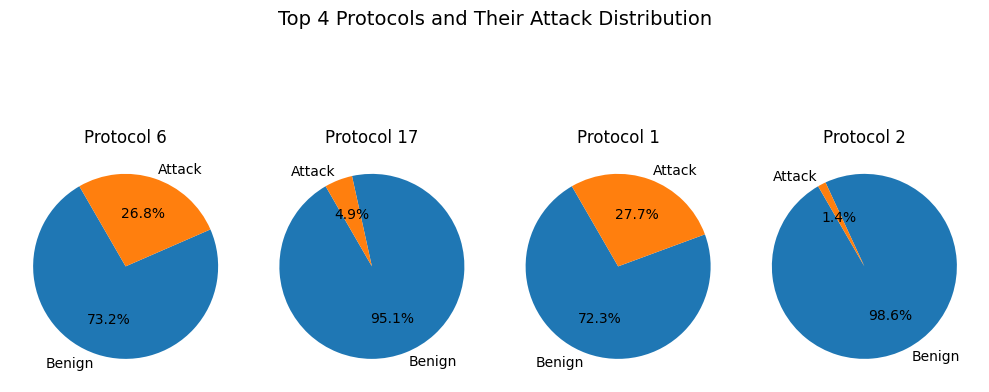

In [24]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 4, figsize=(10, 5))

df.loc[df['PROTOCOL'] == 6, 'Attack_Binary'].value_counts().plot.pie(autopct="%1.1f%%", startangle=120, ax=axes[0], title="Protocol 6")

df.loc[df['PROTOCOL'] == 17, 'Attack_Binary'].value_counts().plot.pie(autopct="%1.1f%%", startangle=120, ax=axes[1], title="Protocol 17")

df.loc[df['PROTOCOL'] == 1, 'Attack_Binary'].value_counts().plot.pie(autopct="%1.1f%%", startangle=120, ax=axes[2], title="Protocol 1")

df.loc[df['PROTOCOL'] == 2, 'Attack_Binary'].value_counts().plot.pie(autopct="%1.1f%%", startangle=120, ax=axes[3], title="Protocol 2")
fig.suptitle("Top 4 Protocols and Their Attack Distribution", fontsize=14)
for ax in axes:
    ax.set_ylabel('')
plt.tight_layout()
plt.show()


In [25]:
df['IPV4_DST_ADDR'].nunique()

27826

In [26]:
# get top 5 IPs by frequency
top_addrs = df['IPV4_DST_ADDR'].value_counts().head(20).index  

# now filter only those addresses in groupby
df.groupby('IPV4_DST_ADDR')['Attack_Binary'].value_counts().unstack().loc[top_addrs]


Attack_Binary,Attack,Benign
IPV4_DST_ADDR,,
172.31.0.2,"33,028.00","2,010,303.00"
172.31.69.25,"554,564.00","4,728.00"
192.168.100.3,"265,915.00","6,890.00"
192.168.1.190,"263,771.00","7,888.00"
169.254.169.254,NaN,"235,274.00"
192.168.1.195,"178,868.00","12,715.00"
192.168.1.152,"189,360.00",302.00
149.171.126.2,NaN,"151,635.00"
149.171.126.1,NaN,"151,585.00"


<Axes: title={'center': 'Attack vs Benign per IP'}, xlabel='IPV4_DST_ADDR'>

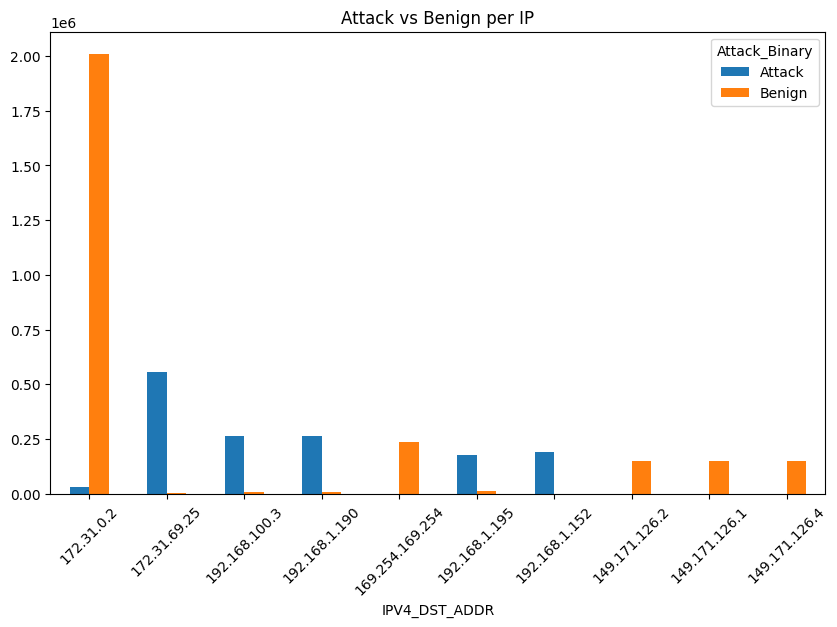

In [27]:
top_addrs = df['IPV4_DST_ADDR'].value_counts().head(10).index  

df_top = (
    df.groupby('IPV4_DST_ADDR')['Attack_Binary']
      .value_counts()
      .unstack(fill_value=0)
      .loc[top_addrs]
)

df_top.plot(kind="bar", figsize=(10,6), rot=45, title="Attack vs Benign per IP")


<Axes: title={'center': 'Attack vs Benign per IP'}, xlabel='IPV4_SRC_ADDR'>

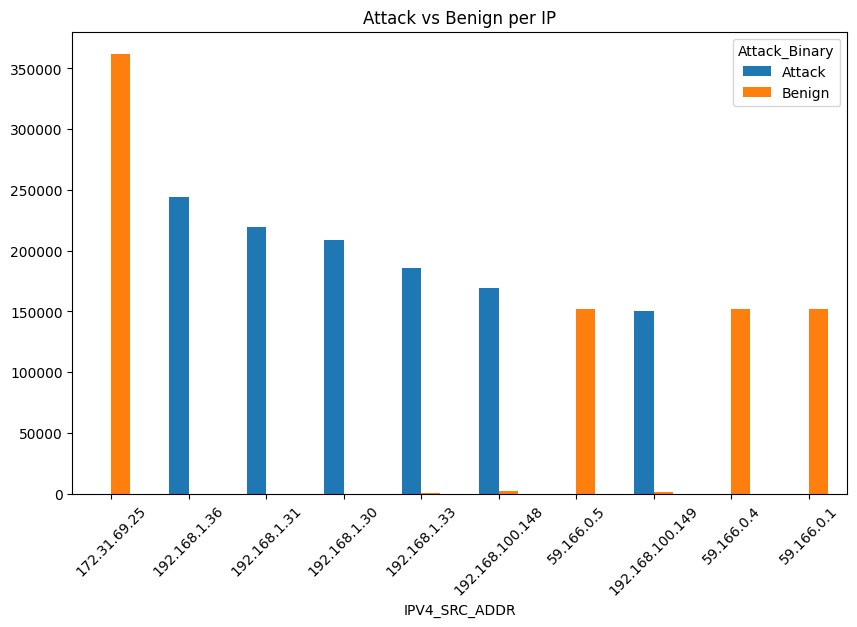

In [28]:
top_addrs = df['IPV4_SRC_ADDR'].value_counts().head(10).index  

df_top = (
    df.groupby('IPV4_SRC_ADDR')['Attack_Binary']
      .value_counts()
      .unstack(fill_value=0)
      .loc[top_addrs]
)

df_top.plot(kind="bar", figsize=(10,6), rot=45, title="Attack vs Benign per IP")


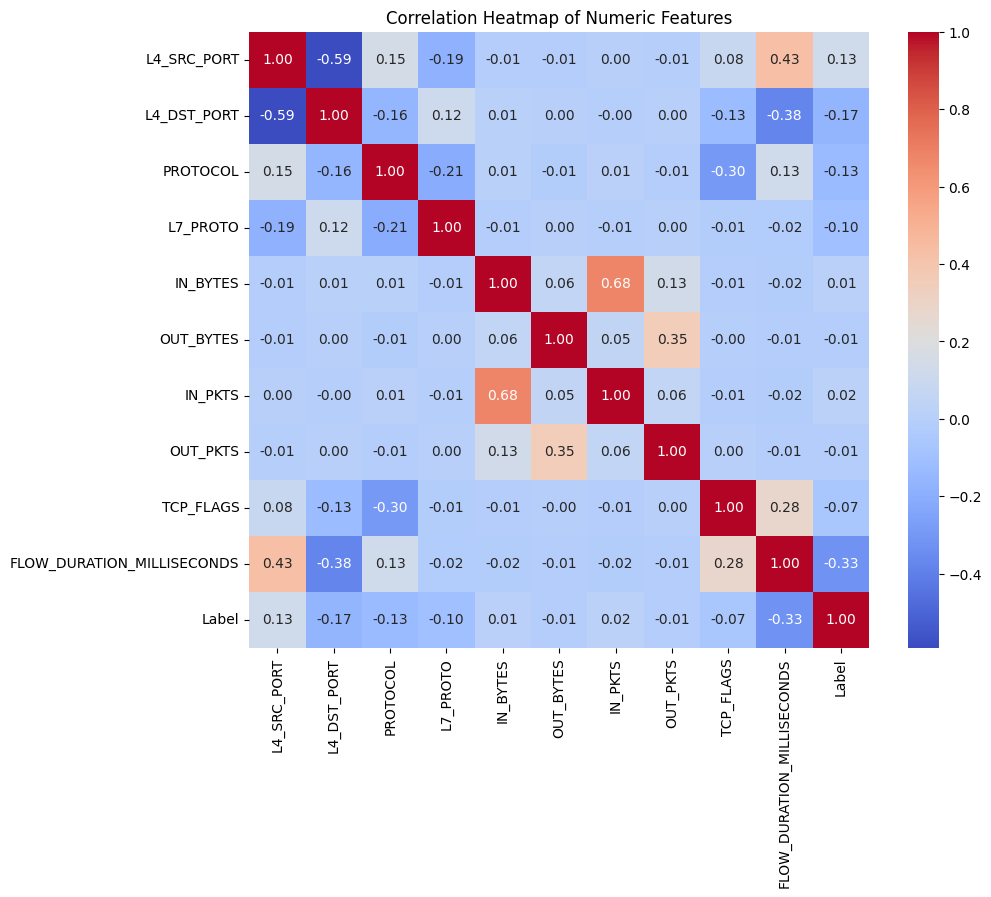

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns


numeric_cols = df.select_dtypes(include=['int64', 'float64'])


corr = numeric_cols.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


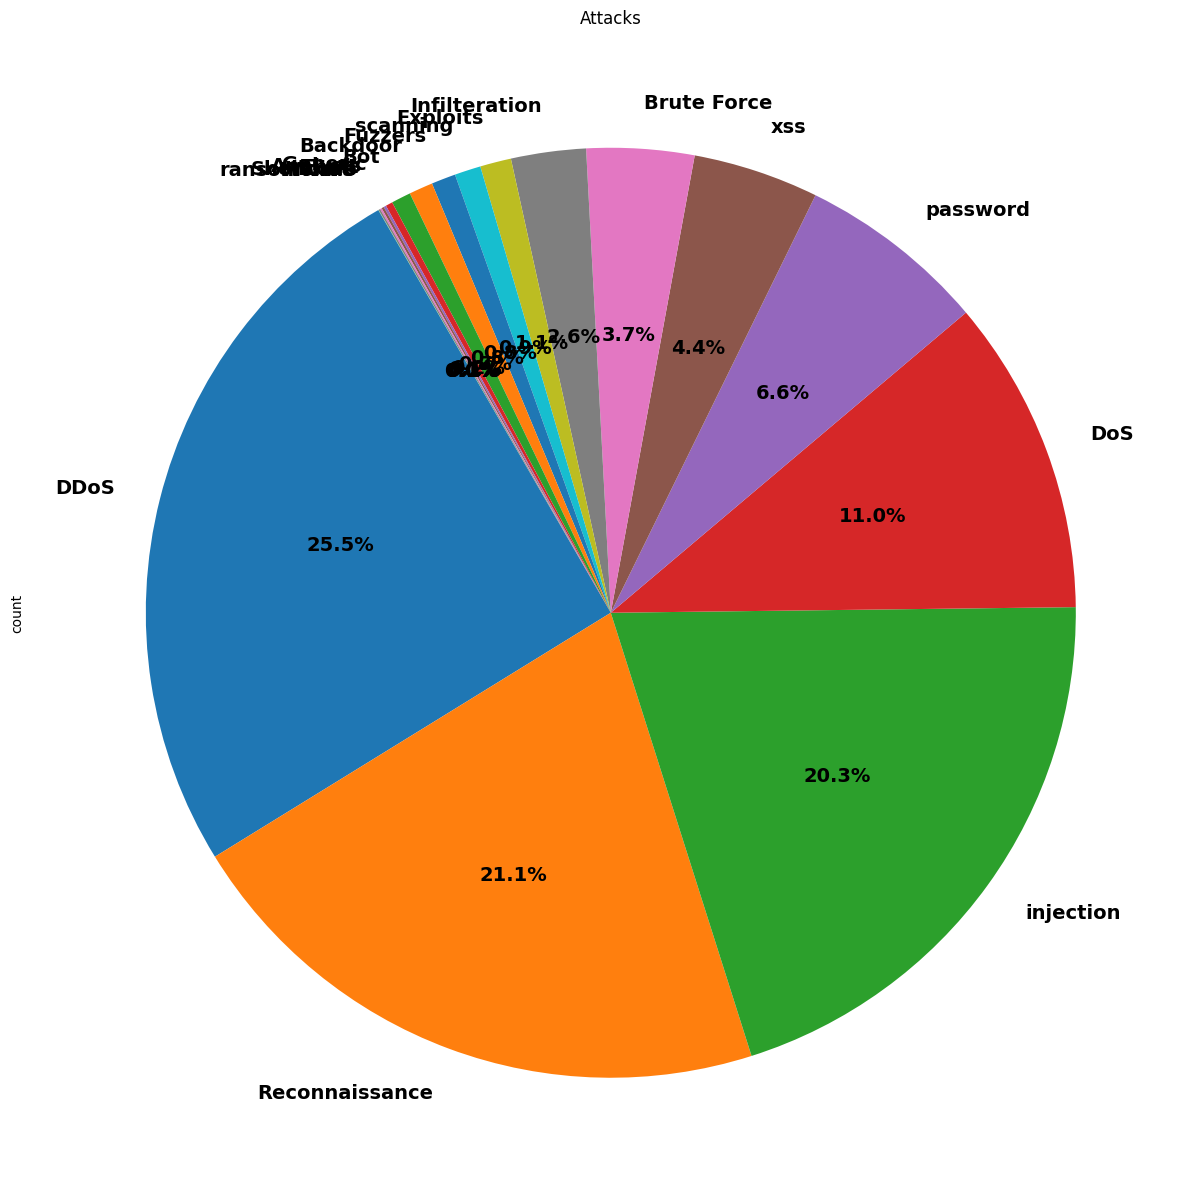

In [30]:
plt.figure(figsize=(15,20))
attack_df['Attack'].value_counts().plot.pie(autopct="%1.1f%%", startangle=120,title="Attacks",textprops={'weight': 'bold'},fontsize=14)
plt.show()

In [31]:
df['Attack_Binary'].value_counts()

Attack_Binary
Benign    8440723
Attack    2288316
Name: count, dtype: int64

In [32]:
#modelling

In [33]:
df.isnull().sum()

IPV4_SRC_ADDR                 0
L4_SRC_PORT                   0
IPV4_DST_ADDR                 0
L4_DST_PORT                   0
PROTOCOL                      0
L7_PROTO                      0
IN_BYTES                      0
OUT_BYTES                     0
IN_PKTS                       0
OUT_PKTS                      0
TCP_FLAGS                     0
FLOW_DURATION_MILLISECONDS    0
Label                         0
Attack                        0
Attack_Binary                 0
dtype: int64

In [34]:
#let’s engineer the IP features

In [35]:
import ipaddress
import pandas as pd


# Private/Public flag
def is_private_ip(ip):
    try:
        return int(ipaddress.ip_address(ip).is_private)
    except:
        return -1 
        

# Subnet extraction
def get_subnet(ip, prefix=24):
    try:
        parts = ip.split('.')
        if prefix == 16:
            return ".".join(parts[:2])
        elif prefix == 24:
            return ".".join(parts[:3])
    except:
        return "unknown"


# Private/Public
df['SRC_IS_PRIVATE'] = df['IPV4_SRC_ADDR'].apply(is_private_ip)
df['DST_IS_PRIVATE'] = df['IPV4_DST_ADDR'].apply(is_private_ip)

# Subnets
df['SRC_SUBNET16'] = df['IPV4_SRC_ADDR'].apply(lambda x: get_subnet(x, 16))
df['SRC_SUBNET24'] = df['IPV4_SRC_ADDR'].apply(lambda x: get_subnet(x, 24))
df['DST_SUBNET16'] = df['IPV4_DST_ADDR'].apply(lambda x: get_subnet(x, 16))
df['DST_SUBNET24'] = df['IPV4_DST_ADDR'].apply(lambda x: get_subnet(x, 24))

In [36]:
print(df.loc[df['Attack_Binary'] == 'Attack','SRC_IS_PRIVATE'].value_counts(),'\n')
print(df.loc[df['Attack_Binary'] == 'Benign','SRC_IS_PRIVATE'].value_counts(),'\n')

SRC_IS_PRIVATE
1    1654398
0     633918
Name: count, dtype: int64 

SRC_IS_PRIVATE
 1    4908921
 0    3531801
-1          1
Name: count, dtype: int64 



In [37]:
lst = ['SRC_SUBNET16','SRC_SUBNET24','DST_SUBNET16','DST_SUBNET24','SRC_IS_PRIVATE','DST_IS_PRIVATE']

def vc(a):
    for i in a:
        print('nuniques for',i,':',df[i].nunique(),'\n')
vc(lst)

nuniques for SRC_SUBNET16 : 14771 

nuniques for SRC_SUBNET24 : 60647 

nuniques for DST_SUBNET16 : 5062 

nuniques for DST_SUBNET24 : 13869 

nuniques for SRC_IS_PRIVATE : 3 

nuniques for DST_IS_PRIVATE : 3 



In [38]:
df.groupby(['SRC_IS_PRIVATE', 'Attack_Binary']).size().unstack(fill_value=0)

Attack_Binary,Attack,Benign
SRC_IS_PRIVATE,,
-1,0,1
0,633918,3531801
1,1654398,4908921


In [39]:
df.groupby(['IN_BYTES', 'Attack_Binary']).size().unstack(fill_value=0).head()


Attack_Binary,Attack,Benign
IN_BYTES,,
0,0,3
28,24496,3920
29,0,288
30,19,64
32,50,554


In [40]:
df.groupby(['DST_IS_PRIVATE', 'Attack_Binary']).size().unstack(fill_value=0)

Attack_Binary,Attack,Benign
DST_IS_PRIVATE,,
-1,0,2
0,217547,3901996
1,2070769,4538725


In [41]:
df.groupby(['DST_IS_PRIVATE', 'Attack_Binary']).size().unstack(fill_value=0)

Attack_Binary,Attack,Benign
DST_IS_PRIVATE,,
-1,0,2
0,217547,3901996
1,2070769,4538725


In [42]:
#REVISED SHAPE
df = df.drop(columns=["IPV4_SRC_ADDR", "IPV4_DST_ADDR"])
df.shape

(10729039, 19)

In [43]:
#TARGETTING L4_SRC_PORT / L4_DST_PORT NOW

In [44]:
print(df['L4_SRC_PORT'].value_counts().head(20),'\n')
print(df['L4_DST_PORT'].value_counts().head(20))

L4_SRC_PORT
3389     433899
80       344083
443      155394
0         34824
22        32827
21        28386
53        14607
445       11242
40850      8470
50099      8281
49672      5762
54193      4211
49673      4045
6666       3782
50622      3539
6000       3483
42023      3457
56504      2431
58834      2334
49674      2320
Name: count, dtype: int64 

L4_DST_PORT
53      2419581
80      2014579
443     1439853
3389    1305012
445      361686
22       125526
5190      93475
6881      89576
111       76135
25        69775
21        68999
23        42282
143       40446
0         34824
5355      30059
8080      29471
135       23727
179       18514
8545      16382
9197      10957
Name: count, dtype: int64


RDP (3389) is one of the most brute-forced ports on the internet (used in ransomware attacks).

DNS (53) is commonly abused for data exfiltration.

Port 0 is reserved but often used by attackers to evade detection.

In [45]:
def categorize_port(port):
    if port == 0:
        return "invalid"
    elif 0 < port <= 1023:
        return "well_known"
    elif 1024 <= port <= 49151:
        return "registered"
    elif 49152 <= port <= 65535:
        return "ephemeral"
    else:
        return "other"  # for safety, in case of unexpected values

# Apply to your dataframe
df["SRC_PORT_CATEGORY"] = df["L4_SRC_PORT"].apply(categorize_port)
df["DST_PORT_CATEGORY"] = df["L4_DST_PORT"].apply(categorize_port)


In [46]:
df.groupby(['SRC_PORT_CATEGORY', 'Attack_Binary']).size().unstack(fill_value=0)

Attack_Binary,Attack,Benign
SRC_PORT_CATEGORY,,
ephemeral,1213521,5491840
invalid,15397,19427
registered,1057815,2331527
well_known,1583,597929


In [47]:
def categorize_port(port):
    if port in [80, 443, 8080]:
        return 'Web'
    elif port in [22]:
        return 'SSH'
    elif port in [3389]:
        return 'RDP'
    elif port in [23]:
        return 'Telnet'
    elif port in [21, 20, 69]:
        return 'File Transfer'
    elif port in [25, 110, 143]:
        return 'Mail'
    elif port in [53, 5355]:
        return 'DNS'
    elif port in [111, 135]:
        return 'RPC'
    elif port in [139, 445]:
        return 'Windows Services'
    elif 6881 <= port <= 6889:
        return 'P2P'
    elif port == 0:
        return 'Invalid/Reserved'
    elif port >= 49152:
        return 'Ephemeral'
    else:
        return 'Other'


df['SRC_PORT_CAT'] = df['L4_SRC_PORT'].apply(categorize_port)
df['DST_PORT_CAT'] = df['L4_DST_PORT'].apply(categorize_port)


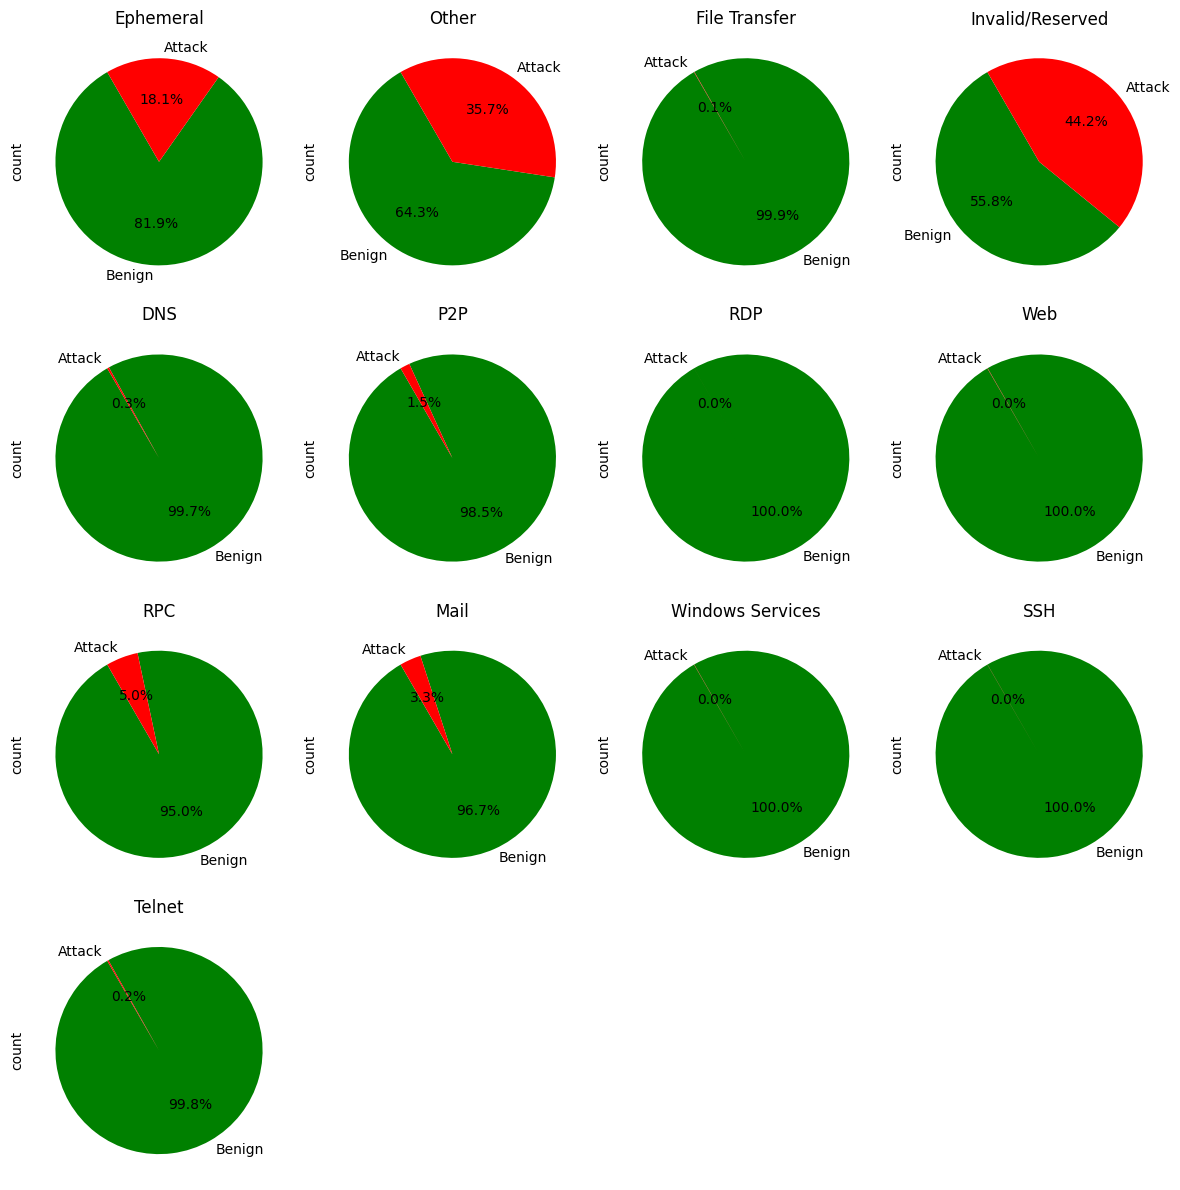

In [48]:
src_cats = df['SRC_PORT_CAT'].unique()

fig, axes = plt.subplots(4, 4, figsize=(12, 12))  # adjust rows/cols if needed
axes = axes.flatten()  # flatten grid to 1D array

colors=["green", "red"]
for idx, cat in enumerate(src_cats):
    df.loc[df['SRC_PORT_CAT'] == cat, 'Attack_Binary'].value_counts().plot.pie(
        autopct="%1.1f%%",colors=colors, startangle=120, ax=axes[idx], title=cat
    )

# Hide any unused subplots
for j in range(len(src_cats), len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


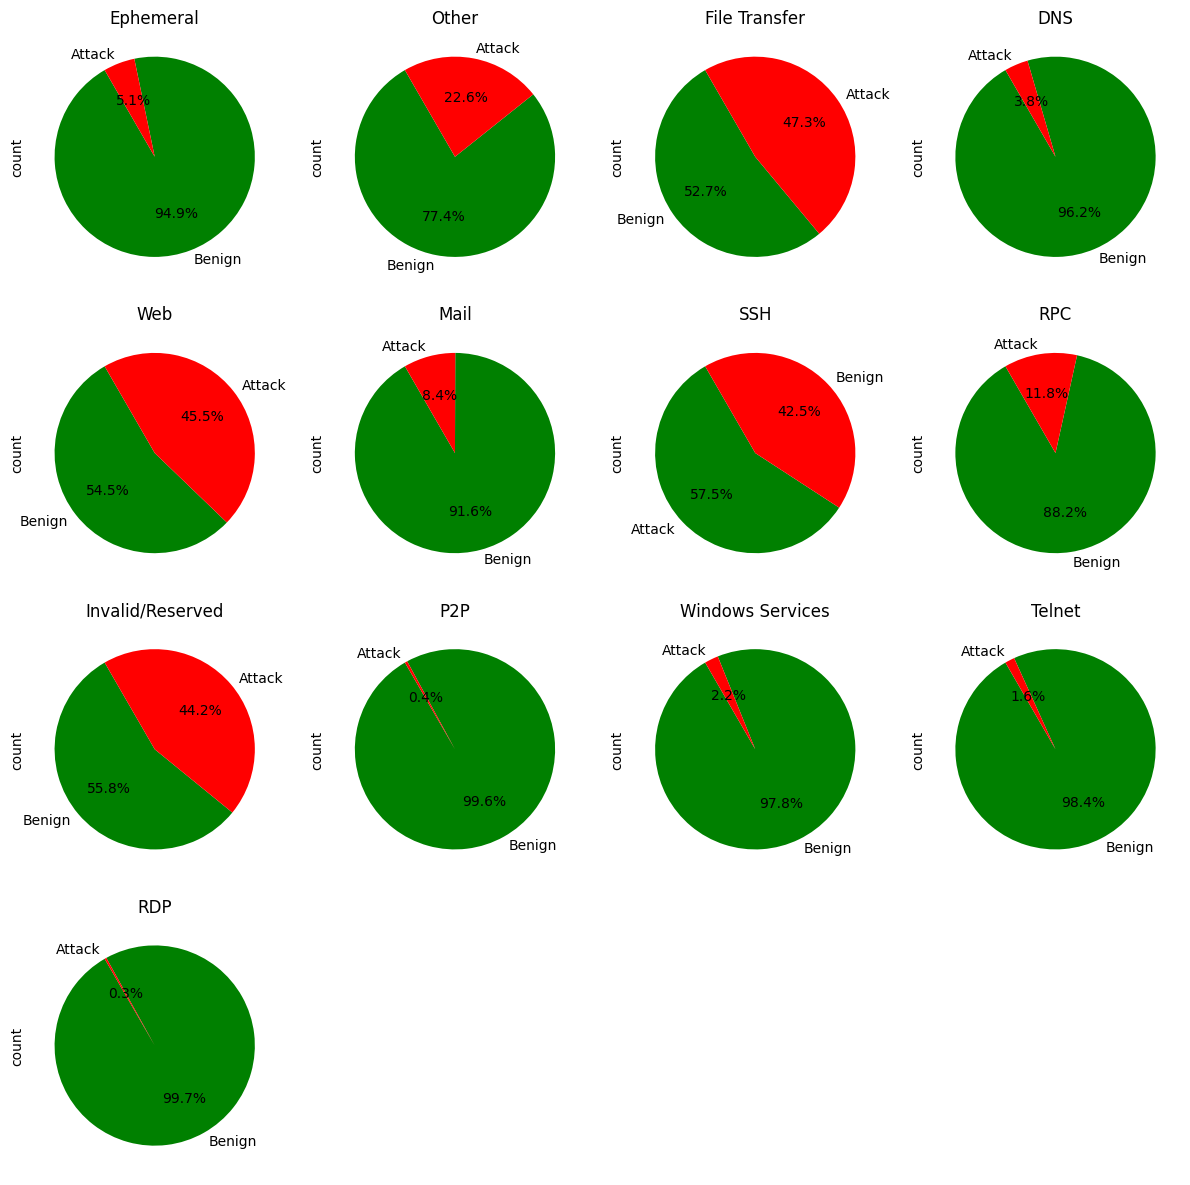

In [49]:
src_cats = df['DST_PORT_CAT'].unique()

fig, axes = plt.subplots(4, 4, figsize=(12, 12))  # adjust rows/cols if needed
axes = axes.flatten()  # flatten grid to 1D array
colors=["green","red"]
for idx, cat in enumerate(src_cats):
    df.loc[df['DST_PORT_CAT'] == cat, 'Attack_Binary'].value_counts().plot.pie(
        autopct="%1.1f%%",colors=colors, startangle=120, ax=axes[idx], title=cat
    )

# Hide any unused subplots
for j in range(len(src_cats), len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


In [50]:
df.groupby(['SRC_PORT_CAT', 'Attack_Binary']).size().unstack(fill_value=0)

Attack_Binary,Attack,Benign
SRC_PORT_CAT,,
DNS,44,14618
Ephemeral,1213521,5491840
File Transfer,18,28387
Invalid/Reserved,15397,19427
Mail,10,290
Other,1059034,1904057
P2P,7,459
RDP,10,433889
RPC,11,209


In [51]:
df.groupby(['DST_PORT_CAT', 'Attack_Binary']).size().unstack(fill_value=0)

Attack_Binary,Attack,Benign
DST_PORT_CAT,,
DNS,93629,2356011
Ephemeral,35377,662964
File Transfer,33124,36919
Invalid/Reserved,15397,19427
Mail,9444,103246
Other,418011,1430323
P2P,373,89486
RDP,3976,1301036
RPC,11774,88088


In [52]:
df.shape

(10729039, 23)

In [53]:
#REVISED SHAPE
df = df.drop(columns=["L4_SRC_PORT", "L4_DST_PORT"])
df.shape

(10729039, 21)

In [54]:
#preprocess protocol
df['PROTOCOL'].unique().sum()

32640

In [55]:
df['PROTOCOL'].value_counts().head(30)

PROTOCOL
6      7990227
17     2704171
1        14451
2         6782
58        1956
89         908
47          86
33          77
77          77
55          77
53          77
41          77
103         77
132         70
0           45
142         41
141         41
171         41
172         41
173         41
174         41
175         41
176         41
177         41
178         41
179         41
140         41
180         41
139         41
181         41
Name: count, dtype: int64

In [56]:
def map_protocol(x):
    if x == 6:
        return "TCP"
    elif x == 17:
        return "UDP"
    elif x == 1:
        return "ICMP"
    elif x == 2:
        return "IGMP"
    else:
        return "Other"

df["PROTOCOL_CAT"] = df["PROTOCOL"].apply(map_protocol)


In [57]:

protocol_map = {
    6: "TCP",
    17: "UDP",
    1: "ICMP",
    2: "IGMP"
}

df["PROTOCOL_CAT"] = df["PROTOCOL"].map(protocol_map).fillna("Other")

# Step 3: Check distribution
print(df["PROTOCOL_CAT"].value_counts(normalize=True) * 100)  # in %


PROTOCOL_CAT
TCP     74.47
UDP     25.20
ICMP     0.13
Other    0.12
IGMP     0.06
Name: proportion, dtype: float64


In [58]:
protocol_dummies = pd.get_dummies(df['PROTOCOL_CAT'], prefix='PROTO')

df = pd.concat([df, protocol_dummies], axis=1)

df = df.drop(columns=['PROTOCOL', 'PROTOCOL_CAT'])


In [59]:
df.shape

(10729039, 25)

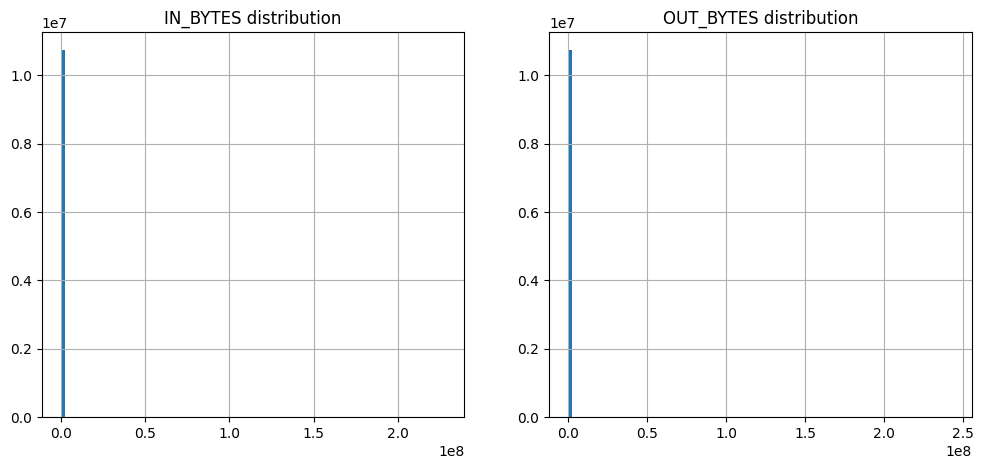

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
df['IN_BYTES'].hist(bins=100)
plt.title("IN_BYTES distribution")

plt.subplot(1,2,2)
df['OUT_BYTES'].hist(bins=100)
plt.title("OUT_BYTES distribution")

plt.show()


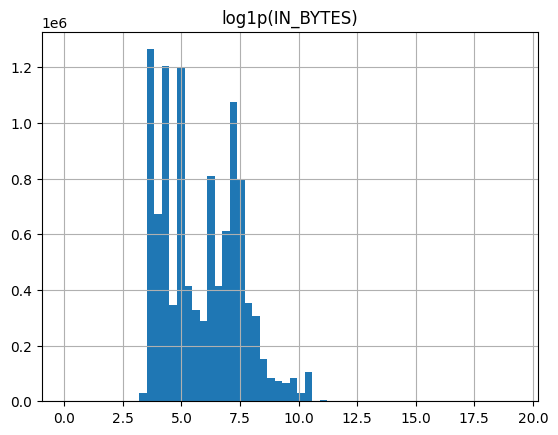

In [61]:
import numpy as np
df['IN_BYTES_LOG'] = np.log1p(df['IN_BYTES'])
df['IN_BYTES_LOG'].hist(bins=60)
plt.title('log1p(IN_BYTES)')
plt.show()


In [62]:
for col in ["OUT_BYTES", "IN_PKTS", "OUT_PKTS"]:
    df[col + "_LOG"] = np.log1p(df[col])

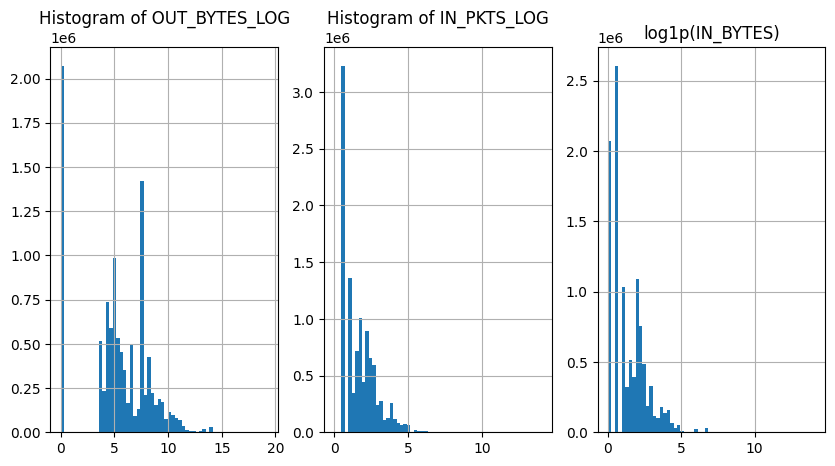

In [63]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
axes = axes.flatten()
for ax, col in zip(axes,["OUT_BYTES_LOG", "IN_PKTS_LOG", "OUT_PKTS_LOG"]):
    df[col].hist(bins=60,ax=ax)
    ax.set_title(f"Histogram of {col}")
    plt.title('log1p(IN_BYTES)')
plt.show()

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10729039 entries, 0 to 10729038
Data columns (total 29 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   L7_PROTO                    float64
 1   IN_BYTES                    int64  
 2   OUT_BYTES                   int64  
 3   IN_PKTS                     int64  
 4   OUT_PKTS                    int64  
 5   TCP_FLAGS                   int64  
 6   FLOW_DURATION_MILLISECONDS  int64  
 7   Label                       int64  
 8   Attack                      object 
 9   Attack_Binary               object 
 10  SRC_IS_PRIVATE              int64  
 11  DST_IS_PRIVATE              int64  
 12  SRC_SUBNET16                object 
 13  SRC_SUBNET24                object 
 14  DST_SUBNET16                object 
 15  DST_SUBNET24                object 
 16  SRC_PORT_CATEGORY           object 
 17  DST_PORT_CATEGORY           object 
 18  SRC_PORT_CAT                object 
 19  DST_PORT_CAT       

In [65]:
df = df.drop(columns=["IN_BYTES", "OUT_BYTES", "IN_PKTS", "OUT_PKTS"])


In [66]:
df.shape

(10729039, 25)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10729039 entries, 0 to 10729038
Data columns (total 25 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   L7_PROTO                    float64
 1   TCP_FLAGS                   int64  
 2   FLOW_DURATION_MILLISECONDS  int64  
 3   Label                       int64  
 4   Attack                      object 
 5   Attack_Binary               object 
 6   SRC_IS_PRIVATE              int64  
 7   DST_IS_PRIVATE              int64  
 8   SRC_SUBNET16                object 
 9   SRC_SUBNET24                object 
 10  DST_SUBNET16                object 
 11  DST_SUBNET24                object 
 12  SRC_PORT_CATEGORY           object 
 13  DST_PORT_CATEGORY           object 
 14  SRC_PORT_CAT                object 
 15  DST_PORT_CAT                object 
 16  PROTO_ICMP                  bool   
 17  PROTO_IGMP                  bool   
 18  PROTO_Other                 bool   
 19  PROTO_TCP          

In [68]:
df['TCP_FLAGS'].value_counts().head(30)

TCP_FLAGS
0      2740010
27     2478382
219     750950
222     724270
20      579584
30      487867
22      446526
24      446122
2       325331
218     256883
31      219805
18      201895
25      187693
223     165729
17      159558
23      137064
26      126736
19       97931
29       54052
16       32175
211      29031
214      25937
28       20463
194      11756
4         6406
6         5111
21        3226
215       2099
210       1954
90        1593
Name: count, dtype: int64

In [69]:
# Top 10 TCP_FLAGS values
top_tcp_flags = [0, 27, 219, 222, 20, 30, 22, 24, 2, 218,31,18]


top_flag_count = df['TCP_FLAGS'].isin(top_tcp_flags).sum()

total_rows = len(df)

# Calculate the percentage
percentage_top_flags = (top_flag_count / total_rows) * 100

print(f"Top 10 TCP_FLAGS cover {percentage_top_flags:.2f}% of the data.")


Top 10 TCP_FLAGS cover 90.01% of the data.


In [70]:
# Replace TCP_FLAGS with 'Other' if not in the top 12
df['TCP_FLAGS_CAT'] = df['TCP_FLAGS'].apply(lambda x: x if x in top_tcp_flags else 'Other')


df = pd.get_dummies(df, columns=['TCP_FLAGS_CAT'], prefix='TCP_FLAG')


df = df.drop(columns=['TCP_FLAGS'])

df[['TCP_FLAG_' + str(flag) for flag in top_tcp_flags] + ['TCP_FLAG_Other']].head()


,TCP_FLAG_0,TCP_FLAG_27,TCP_FLAG_219,TCP_FLAG_222,TCP_FLAG_20,TCP_FLAG_30,TCP_FLAG_22,TCP_FLAG_24,TCP_FLAG_2,TCP_FLAG_218,TCP_FLAG_31,TCP_FLAG_18,TCP_FLAG_Other
0,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10729039 entries, 0 to 10729038
Data columns (total 37 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   L7_PROTO                    float64
 1   FLOW_DURATION_MILLISECONDS  int64  
 2   Label                       int64  
 3   Attack                      object 
 4   Attack_Binary               object 
 5   SRC_IS_PRIVATE              int64  
 6   DST_IS_PRIVATE              int64  
 7   SRC_SUBNET16                object 
 8   SRC_SUBNET24                object 
 9   DST_SUBNET16                object 
 10  DST_SUBNET24                object 
 11  SRC_PORT_CATEGORY           object 
 12  DST_PORT_CATEGORY           object 
 13  SRC_PORT_CAT                object 
 14  DST_PORT_CAT                object 
 15  PROTO_ICMP                  bool   
 16  PROTO_IGMP                  bool   
 17  PROTO_Other                 bool   
 18  PROTO_TCP                   bool   
 19  PROTO_UDP          

In [72]:
df['FLOW_DURATION_MILLISECONDS'].describe()

count   10,729,039.00
mean     2,362,754.92
std      2,131,195.35
min              0.00
25%              0.00
50%      4,284,517.00
75%      4,294,889.00
max      4,294,967.00
Name: FLOW_DURATION_MILLISECONDS, dtype: float64

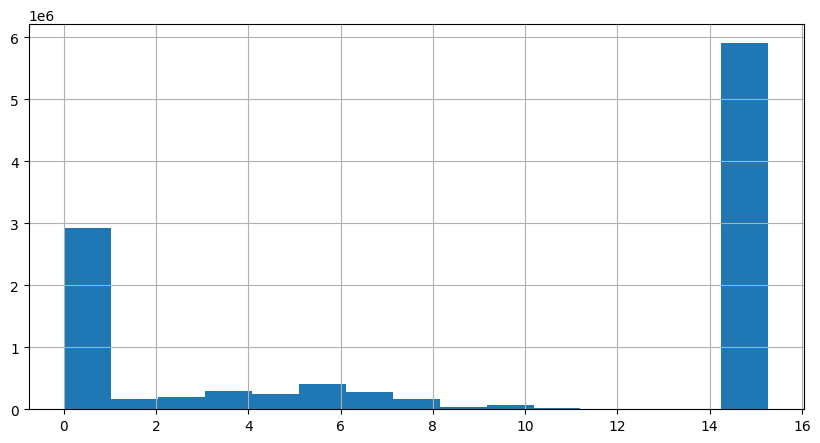

In [73]:
df['FLOW_DURATION_LOG'] = np.log1p(df['FLOW_DURATION_MILLISECONDS'])
df['FLOW_DURATION_LOG'].hist(bins=15, figsize=(10,5))
plt.show()


In [74]:
df['FLOW_DURATION_LOG'].value_counts().head(3)

FLOW_DURATION_LOG
0.00     2715682
15.27    1062111
15.27     499873
Name: count, dtype: int64

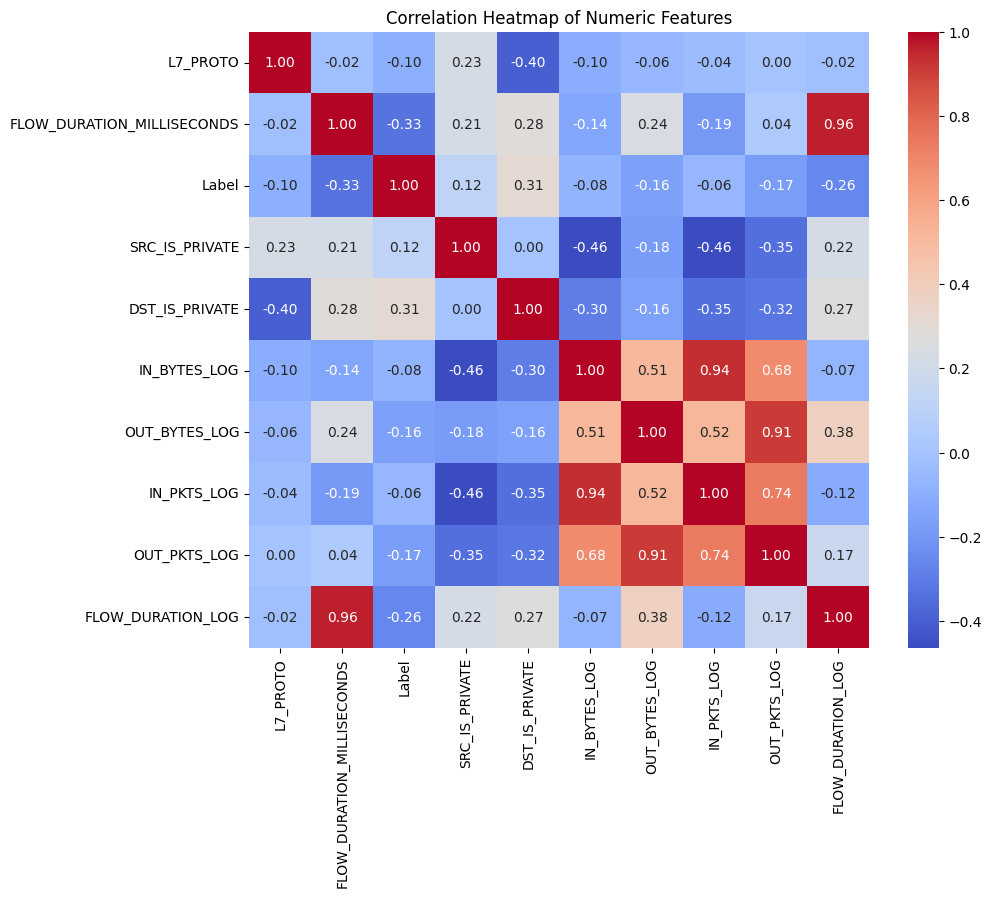

In [75]:
numeric_cols = df.select_dtypes(include=['int64', 'float64'])


numcorr = numeric_cols.corr()
plt.figure(figsize=(10,8))
sns.heatmap(numcorr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [76]:
df = df.drop(columns=['FLOW_DURATION_MILLISECONDS'])

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10729039 entries, 0 to 10729038
Data columns (total 37 columns):
 #   Column             Dtype  
---  ------             -----  
 0   L7_PROTO           float64
 1   Label              int64  
 2   Attack             object 
 3   Attack_Binary      object 
 4   SRC_IS_PRIVATE     int64  
 5   DST_IS_PRIVATE     int64  
 6   SRC_SUBNET16       object 
 7   SRC_SUBNET24       object 
 8   DST_SUBNET16       object 
 9   DST_SUBNET24       object 
 10  SRC_PORT_CATEGORY  object 
 11  DST_PORT_CATEGORY  object 
 12  SRC_PORT_CAT       object 
 13  DST_PORT_CAT       object 
 14  PROTO_ICMP         bool   
 15  PROTO_IGMP         bool   
 16  PROTO_Other        bool   
 17  PROTO_TCP          bool   
 18  PROTO_UDP          bool   
 19  IN_BYTES_LOG       float64
 20  OUT_BYTES_LOG      float64
 21  IN_PKTS_LOG        float64
 22  OUT_PKTS_LOG       float64
 23  TCP_FLAG_0         bool   
 24  TCP_FLAG_2         bool   
 25  TCP_FLAG_18     

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10729039 entries, 0 to 10729038
Data columns (total 37 columns):
 #   Column             Dtype  
---  ------             -----  
 0   L7_PROTO           float64
 1   Label              int64  
 2   Attack             object 
 3   Attack_Binary      object 
 4   SRC_IS_PRIVATE     int64  
 5   DST_IS_PRIVATE     int64  
 6   SRC_SUBNET16       object 
 7   SRC_SUBNET24       object 
 8   DST_SUBNET16       object 
 9   DST_SUBNET24       object 
 10  SRC_PORT_CATEGORY  object 
 11  DST_PORT_CATEGORY  object 
 12  SRC_PORT_CAT       object 
 13  DST_PORT_CAT       object 
 14  PROTO_ICMP         bool   
 15  PROTO_IGMP         bool   
 16  PROTO_Other        bool   
 17  PROTO_TCP          bool   
 18  PROTO_UDP          bool   
 19  IN_BYTES_LOG       float64
 20  OUT_BYTES_LOG      float64
 21  IN_PKTS_LOG        float64
 22  OUT_PKTS_LOG       float64
 23  TCP_FLAG_0         bool   
 24  TCP_FLAG_2         bool   
 25  TCP_FLAG_18     

In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb




In [81]:
# ==== 1. Preprocess ====


# Drop ID-like or target-leakage cols if any
X = df.drop(columns=["Label", "Attack", "Attack_Binary"])
y = df["Label"]   # Or use Attack_Binary if binary classification

# Encode categorical (object) features
for col in X.select_dtypes(include="object").columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))



In [82]:
# ==== 2. Train/test split ====
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [83]:
# ==== 3a. RandomForest ====
rf = RandomForestClassifier(
    n_estimators=30,
    max_depth=20,
    n_jobs=-1,
    random_state=42
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("RandomForest Results:")
print(classification_report(y_test, y_pred_rf))



RandomForest Results:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00   1688145
           1       0.99      0.97      0.98    457663

    accuracy                           0.99   2145808
   macro avg       0.99      0.98      0.99   2145808
weighted avg       0.99      0.99      0.99   2145808



In [84]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [89]:
xgb_model = xgb.XGBClassifier(
    n_estimators=50,
    max_depth=8,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method="hist",   # fast training
    random_state=42
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Results:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Results:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99   1688145
           1       0.99      0.97      0.98    457663

    accuracy                           0.99   2145808
   macro avg       0.99      0.98      0.99   2145808
weighted avg       0.99      0.99      0.99   2145808



In [100]:
import joblib

# Save
joblib.dump(rf, "random_forest_model.pkl")


['random_forest_model.pkl']

In [101]:
joblib.dump(xgb_model, "xg_model.pkl")

['xg_model.pkl']

In [1]:
import pandas as pd
df = pd.read_parquet("preprocessed_nf_uniq.parquet")

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# ==== 1. Preprocess ====
X = df.drop(columns=["Label", "Attack", "Attack_Binary"])
y = df["Attack"]

# Encode categorical (object) features in X
for col in X.select_dtypes(include="object").columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# Encode y (Attack multiclass)
y_le = LabelEncoder()
y = y_le.fit_transform(y)   # numeric targets for RF/XGB

# ==== 2. Train-test split ====
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [4]:
import joblib
joblib.dump(y_le, "attack_label_encoder.pkl")

['attack_label_encoder.pkl']

In [5]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

rf = RandomForestClassifier(n_estimators=30, max_depth=20, n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)

,n_estimators,30
,criterion,'gini'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [6]:
xgb_model = xgb.XGBClassifier(
    n_estimators=20,
    max_depth=8,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method="hist",
    random_state=42
)
xgb_model.fit(X_train, y_train)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [16]:
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.13      0.96      0.22       398
           1       0.88      0.91      0.89      3804
           2       1.00      0.96      0.98   1688145
           3       1.00      1.00      1.00      3100
           4       1.00      1.00      1.00     17102
           5       0.98      0.67      0.80    116507
           6       0.72      0.91      0.80     50225
           7       0.73      0.76      0.75      4945
           8       0.38      0.90      0.53      3866
           9       0.45      0.64      0.53      1111
          10       0.21      1.00      0.35     11901
          11       0.98      0.90      0.94     96586
          12       0.25      0.99      0.40       273
          13       0.11      1.00      0.19       382
          14       0.21      1.00      0.34        30
          15       0.89      0.31      0.46     92896
          16       0.08      0.92      0.14       258
          17       0.30    

In [13]:
joblib.dump(xgb_model, "xg_model_multiclass.pkl")

['xg_model_multiclass.pkl']

In [3]:
from sklearn.metrics import classification_report

In [4]:
from sklearn.utils.class_weight import compute_sample_weight

# Compute balanced sample weights
sample_weights = compute_sample_weight(class_weight="balanced", y=y_train)




In [6]:
import xgboost as xgb


xgb_model = xgb.XGBClassifier(
    n_estimators=20,
    max_depth=8,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method="hist",
    random_state=42
)

# Fit with sample weights
xgb_model.fit(X_train, y_train, sample_weight=sample_weights)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [7]:
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.13      0.96      0.22       398
           1       0.88      0.91      0.89      3804
           2       1.00      0.96      0.98   1688145
           3       1.00      1.00      1.00      3100
           4       1.00      1.00      1.00     17102
           5       0.98      0.67      0.80    116507
           6       0.72      0.91      0.80     50225
           7       0.73      0.76      0.75      4945
           8       0.38      0.90      0.53      3866
           9       0.45      0.64      0.53      1111
          10       0.21      1.00      0.35     11901
          11       0.98      0.90      0.94     96586
          12       0.25      0.99      0.40       273
          13       0.11      1.00      0.19       382
          14       0.21      1.00      0.34        30
          15       0.89      0.31      0.46     92896
          16       0.08      0.92      0.14       258
          17       0.30    